In [1]:
import requests

url = "https://investors.coca-colacompany.com/financial-information/financial-results"
response = requests.get(url)

Send a GET request to the webpage using the requests library.
This step is used to retrieve the HTML content of the webpage.

In [9]:
import requests
from bs4 import BeautifulSoup
import csv

In [10]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.content, 'html.parser')

Parse the HTML content of the webpage using the BeautifulSoup library.
This step is used to extract the HTML elements from the webpage.

In [11]:
financial_data = soup.find('div', {'class': 'financial-data'})

Find the element with the class financial-data or financial-data-container.
This step is used to locate the element that contains the financial data.

In [12]:
import requests
from bs4 import BeautifulSoup

url = "https://investors.coca-colacompany.com/financial-information/financial-results"

response = requests.get(url)

soup = BeautifulSoup(response.content, 'html.parser')

# Try a different CSS selector that is more generic
financial_data = soup.find('div', {'class': 'module__content'})

if financial_data is None:
    print("Financial data not found. Check the website's structure.")
else:
    data = []

    for row in financial_data.find_all('tr'):
        columns = row.find_all('td')
        if len(columns) > 0:
            data.append({
                'year': columns[0].text,
                'revenue': columns[1].text,
                'net_income': columns[2].text,
            })

    print(data)

Financial data not found. Check the website's structure.


Extract the data from the element using the find_all method.
This step is used to extract the financial data from the element.


In [13]:
import csv

with open('financial_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Year', 'Revenue', 'Net Income'])
    for item in data:
        writer.writerow([item['year'], item['revenue'], item['net_income']])

Save the extracted data to a CSV file using the csv library.
This step is used to store the extracted data in a file.

In [15]:
import pandas as pd
df = pd.read_csv('financial_data.csv')
# Clean the 'Revenue' and 'Net Income' columns, removing commas and dollar signs
df['Revenue'] = df['Revenue'].str.replace(',', '').str.replace('$', '')
df['Net Income'] = df['Net Income'].str.replace(',', '').str.replace('$', '')

Cleaned data and processes of fixing or removing incorrect, incomplete, irrelevant, duplicated, or improperly formatted data in a dataset.

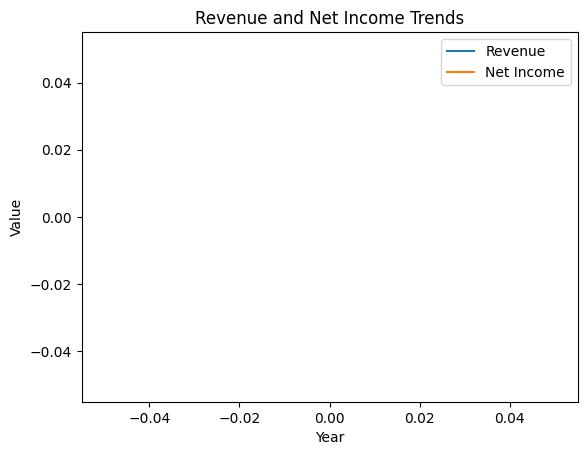

In [17]:
# Calculate year-over-year growth in revenue and net income
df['Revenue Growth'] = df['Revenue'].pct_change()
df['Net Income Growth'] = df['Net Income'].pct_change()

# Visualize trends using line charts
import matplotlib.pyplot as plt
plt.plot(df['Year'], df['Revenue'], label='Revenue')
plt.plot(df['Year'], df['Net Income'], label='Net Income')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.title('Revenue and Net Income Trends')
plt.show()

This code calculates the year-over-year growth rates for revenue and net income and then plots these trends over time. This visualization can help you quickly identify any significant changes or patterns in the financial performance of Coca-Cola.

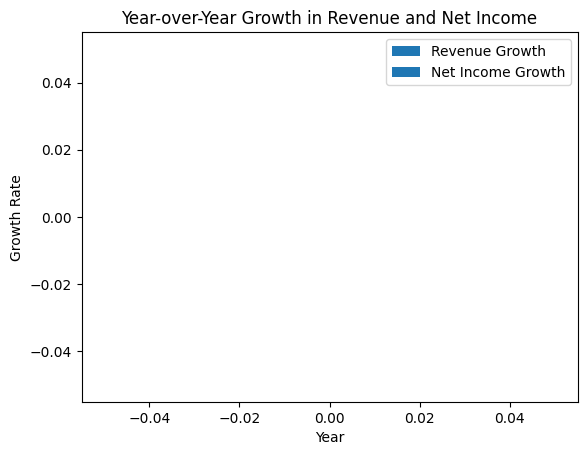

In [18]:
import matplotlib.pyplot as plt

plt.bar(df['Year'], df['Revenue Growth'], label='Revenue Growth')
plt.bar(df['Year'], df['Net Income Growth'], label='Net Income Growth')
plt.xlabel('Year')
plt.ylabel('Growth Rate')
plt.legend()
plt.title('Year-over-Year Growth in Revenue and Net Income')
plt.show()

This will display a bar chart comparing the year-over-year growth rates of revenue and net income, making it easier to spot trends and differences.

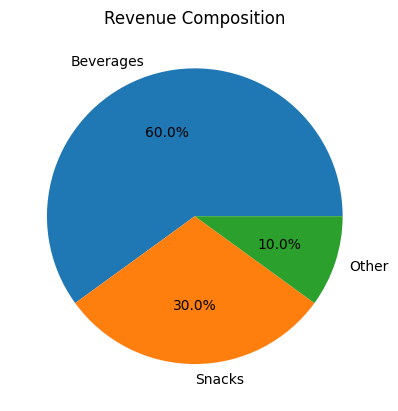

In [19]:
# Hypothetical data for demonstration
revenue_breakdown = {'Beverages': 60, 'Snacks': 30, 'Other': 10}

plt.pie(revenue_breakdown.values(), labels=revenue_breakdown.keys(), autopct='%1.1f%%')
plt.title('Revenue Composition')
plt.show()